# **Memory tilings**

Remember the classic children’s game “memory”? Many square tiles with pictures on one side which you place face down only to turn them over trying to find a match. This is a favorite of my young son. Excellent visual and verbal stimulation for children but surprisingly interesting for adults interested in pattern recognition as well. 

One day while playing, I noted that there is usually a neighboring matching pair somewhere among the tiles.

Why does this happen? Is it just because we do not shuffle the tiles well or is this a natural occurrence each game? As a scientist I know that finding no repetition is unlikely and that small patterns can appear by chance.  In contrast, my wife was surprised when I told her that it is common for matching pairs to end up seemingly by chance next to each other. 

After this topic came up over dinner several times, I decided to find out how often sequential pairs show up and what kind of patterns we can predict. To investigate I used Python for the calculations.

First, I imported the libraries. 

In [2]:
#importing the necessary libraries
import numpy as np
import time
import math
#own functions
from functions_memory1 import *
#for plots
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
%matplotlib inline

The functions I created myself can be found in the file function_memory1. I used 12 matching pairs as this was the number present in my son’s game.  Next, I applied the functions I created to produce a random memory tiling which I have shown below. 

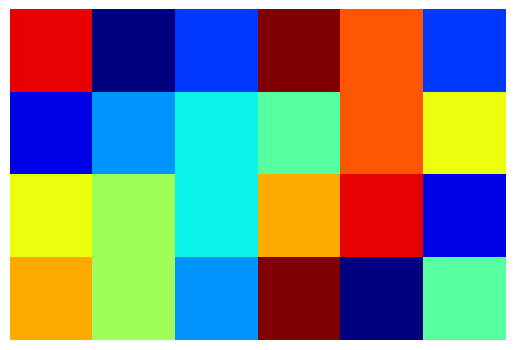

In [4]:
n_pair=12
xar=fac(n_pair)
shuf=random_1d(n_pair)
reord=shuf.reshape(xar[0], xar[1])
plt.axis('off')
plt.imshow(reord,cmap=cm.jet, interpolation='nearest')
#Aim is to replace colors with pictures of real memory tiles

It is visible above that three pairs of neighbors have the same color (dark orange, light green, turquise).  Thus we conclude that in this draw there are identical neighbors. 

The most straight forward way to determine how often there are identical neighbors is to determine for every possible pattern whether there is a at least one pair of identical neighbors. That I do below for the smallest possible memory of two pairs. 

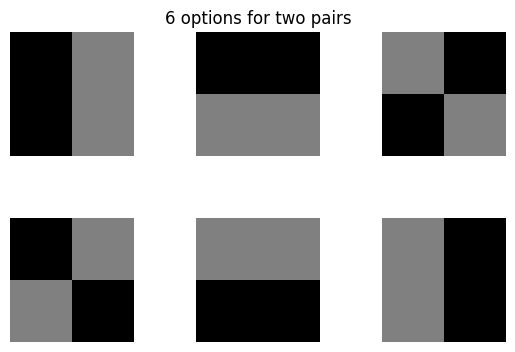

In [3]:
#likely make that also to a function to hide most
mem2a=[[2,2],[1,1]]
mem2b=[[2,1],[2,1]]
mem2c=[[1,2],[2,1]]
mem2d=[[2,1],[1,2]]
mem2e=[[1,2],[1,2]]
mem2f=[[1,1],[2,2]]
com=np.zeros((8,5))
com[0:2,0:2]=mem2a
com[3:5,0:2]=mem2b
com[6:8,0:2]=mem2c
com[0:2,3:5]=mem2d
com[3:5,3:5]=mem2e
com[6:8,3:5]=mem2f
plt.axis('off')
plt.title("6 options for two pairs")
plt.imshow(1-com.T,cmap=cm.gray, interpolation='nearest')

There are six possibilities. 4 of 6 have neighboring pairs, only 2 of 6 (a third) does not have a neighboring pair. 

The number of possible patterns follows from the following consideration:
4 options can be drawn for the first location. Multiplied on that are then three options for the second location and then two for the third while only one option remains for the last location. (This operation of multiplying a number by all numbers equal or smaller than itself is the factorial of a number, the symbol for that operation is !) That results into 24 options which is true when there are 4 different types of tiles. However, because in this case I have two identical pairs, they are equivalent and thus the result is divided twice by 2. (Mathematically that is 2 to to the power of 2.)

As an equation it is: N!/(2)^(N/2) for number of tile, which for pairs is:  (2*P)!/2^P

For two pairs it is: (4 *3 *2)/2^2=24/4=6

That means already for 3 pairs, there are much more pattern: 6 *5 *4 *3 *2/2^3=90 possibilities (permutations).

Thus already for three pairs there are a lot of permutations.
While that still can be counted by a human being, humans are prone to errors, thus 
I then ran the function to get the permutations of 3 pairs and display then the options.

all permutations are 720
unique permutations are 90
run time is 0.0072612762451171875 s


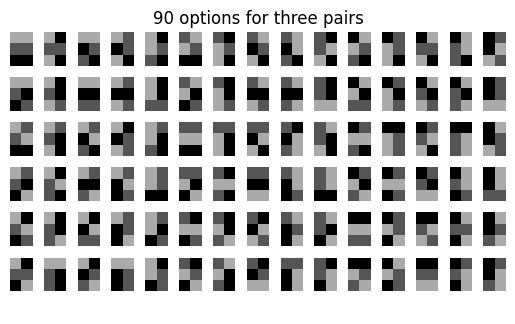

In [4]:
n_pair=3
res=uniqper(n_pair)
xar=fac(n_pair)
mem=np.zeros((44,25))
for i in range(15):
    for j in range(6):
        res2=res[j+i*6]
        reord=res2.reshape(xar[0], xar[1])+1
        mem[i*3:2+3*i,4*j:3+4*j]=reord
plt.axis('off')
plt.title("90 options for three pairs")
plt.imshow(1-mem.T,cmap=cm.gray, interpolation='nearest')

To automate it further I constructed another function which determines whether a pattern contains at least one neighboring pair. I then ran it for 2 to 5 pairs. I printed out the pair, the number of permutations, the time needed to run it on my computer and the percentage without neighboring pairs.

In [5]:
all_perm_prob=np.zeros((2,4))
for i in range(all_perm_prob.shape[1]):
    npair=2+i
    all_perm_prob[0,i]=npair
    all_perm_prob[1,i]=prob_all_perm(npair)
np.savetxt("probabilities_all_permutations.txt", all_perm_prob) 

2 pairs
number of permutations 24
run time is 0.0002 sec
no neighboring pair in tiling to 33.33 % 
3 pairs
number of permutations 720
run time is 0.0597 sec
no neighboring pair in tiling to 13.33 % 
4 pairs
number of permutations 40320
run time is 0.4874 sec
no neighboring pair in tiling to 20.0 % 
5 pairs
number of permutations 3628800
run time is 48.047 sec
no neighboring pair in tiling to 19.68 % 


It is visible in the printed numbers that clearly less than 50% have no pairs in a tiling. While there is a lot variation between 2 and 4 pairs, the fraction is then more stable, but a trend from two numbers is not necessarily reliable.

Already 5 pairs takes long to run on a laptop and for 6 my laptop has not enough memory.

Thus 12 pairs are far from possible with that method. 
Therefore, I make in the following two approximations to get how often there is no pair in a tiling. 

Firstly, I made the calculations using the number of pairs and how they are tiled. 

I assume that each tile is independent of each other. I needed to know the total number of neighborship. A tile can have 2, 3 or 4 neighboring tiles dependent on whether it is is a corner, edge or inner tile. 
The function determined the number of inner, edge, and corner tiles and then gets the number of total neighbors. The number of total neighbors needs to be divided by two since otherwise each neighborship is counted twice.  

By this number is then the probability taken to the power.

The probablity is how likely it is that two neighbors are not a pair. Just one of the 2*pairs options makes it to a pair, given that one of the N is already excluded, since it is the tile considered, the probability is (2 * N-2)/(2*N-1) 

I calculated that for up to 12 pairs. 

In [6]:
nn=int(12)-1
res_ana=np.zeros((4,nn))
for i in range(nn):
    res_ana[0,i]=i+2
    a,b,c=ana_prob(i+2)
    res_ana[1,i]=a
    res_ana[2,i]=b
    res_ana[3,i]=c        

Next I compared the answers obtained using these calculations with the probabilities obtained when checking all permutations, see plot below.

Text(0, 0.5, '% of having no neighboring pair')

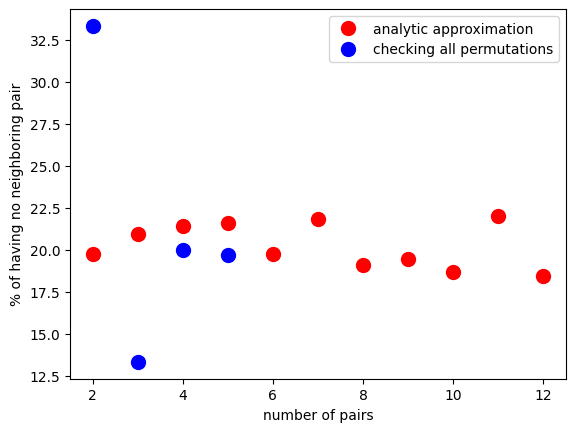

In [8]:
all_perm_prob=np.loadtxt("probabilities_all_permutations.txt") 
plt.plot(res_ana[0],res_ana[3]*100,'o',ms=10,color='red', label='analytic approximation')  
plt.plot(all_perm_prob[0],all_perm_prob[1]*100,'o',ms=10,color='blue', label='checking all permutations')  
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("% of having no neighboring pair")

For 2 and 3 pairs the results obtained with the two methods are rather different, then they get more similar. The high probability for 2 pairs occurs because for this tiling there is a second identical neighboring pair
 when there is a first neighboring one. Thus there are either two or zero neighboring pairs which means the assumption of indepence in the drawing is violeted since in that case also one pair should occur.

  
While it is expected that for a larger number of pairs the assumption of independence gets a better approximation to reality, I then used as cross check a second way for getting a probability, randomly drawing tiles.

That means I drew many tiles randomly and checked each to see whether they had at least one neighboring pair. 
Random draws without checking for repetition in tilings are used to get a large number of tilings fast. 
I ran that sequence for up to 12 pairs. I tried different numbers of draws increasing the number each time to see how many are needed without running it unnecessarily long.

In [10]:
time_start = time.time()
nn=11
res3=np.zeros((2,nn))
for i in range(nn):
    print(f"running for {i+2} pairs")
    res3[0,i]=i+2
    res3[1,i]=count_rand_pairb(res3[0,i],1000000)
time_stop = time.time()    
print(f"number of second needed to run is {time_stop-time_start}")
np.savetxt('random_2_to12_its1000000.txt',res3)

running for 2 pairs
running for 3 pairs
running for 4 pairs
running for 5 pairs
running for 6 pairs
running for 7 pairs
running for 8 pairs
running for 9 pairs
running for 10 pairs
running for 11 pairs
running for 12 pairs
number of second needed to run is 802.0116450786591


By comparison with checking all permulation it is possible to see how many draws are needed that random effects are small. 
It is visible that for 100000 draws the difference is barely visible, and thus that is enough.
Below I ploted the results for the different variants of calculations.

17.3% of drawings have no neighboring pair for tilings of 12 pairs


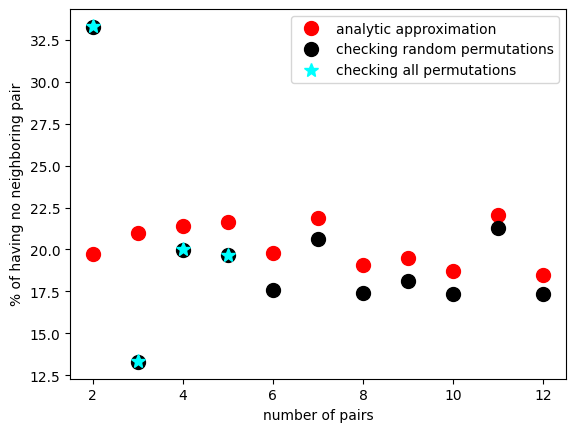

In [17]:
res3=np.loadtxt('random_2_to12_its1000000.txt')
plt.plot(res_ana[0],res_ana[3]*100,'o',ms=10,color='red', label='analytic approximation')   
plt.plot(res3[0],res3[1]*100,'o',ms=10,color='black', label='checking random permutations')
plt.plot(all_perm_prob[0],all_perm_prob[1]*100,'*',ms=10,color='cyan', label='checking all permutations') 
plt.legend(loc="best")
plt.xlabel("number of pairs")
plt.ylabel("% of having no neighboring pair")

print(f"{round(res3[1,10]*100,1)}% of drawings have no neighboring pair for tilings of 12 pairs")

Overall, it is visible that the analytic approximation overestimates the number of no pairs slightly, by about 1% between 4 and 12 pairs. Both agree that having no pair is unlikely for shuffled tiles. For 12 pairs it happens with 17.3% probability which corresponds to about once in six games.